In [87]:
# Suppress Warnings

import warnings
warnings.filterwarnings("ignore")

In [88]:
# Importing requires libraries.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
# Loading our data set into pandas dataframe.

data = pd.read_csv("Netflix Dataset.csv")

In [90]:
data.head()

Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

                                                Type  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         Description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Initial Data Analysis

In [91]:
data.shape

(7789, 11)

##### Our data set contains 7789 rows and 11 columns.

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


##### Columns "Director" , "Cast" , "Country" and "Rating" contain null values.

In [93]:
data.describe()

Show_Id Category              Title                Director  \
count     7789     7789               7789                    5401   
unique    7787        2               7787                    4050   
top      s6621    Movie  The Lost Okoroshi  Raúl Campos, Jan Suter   
freq         2     5379                  2                      18   

                      Cast        Country     Release_Date Rating  Duration  \
count                 7071           7282             7779   7782      7789   
unique                6831            681             1565     14       216   
top     David Attenborough  United States  January 1, 2020  TV-MA  1 Season   
freq                    18           2556              118   2865      1608   

                 Type                                        Description  
count            7789                                               7789  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3

##### No column with data type "int" therefore could not analyse statistical informations.

In [94]:
# Total number of elements in the data set.
data.size

85679

# Task - 1 : Is there any duplicate record in the data set? If yes , then remove the duplicate records.

In [95]:
d = data.copy()

In [96]:
d.shape

(7789, 11)

In [97]:
d = d.drop_duplicates()

In [98]:
d.shape

(7787, 11)

In [99]:
data.shape

(7789, 11)

In [100]:
data[data.duplicated()]

Show_Id Category              Title        Director  \
6300    s684    Movie           Backfire     Dave Patten   
6622   s6621    Movie  The Lost Okoroshi  Abba T. Makama   

                                                   Cast        Country  \
6300  Black Deniro, Byron "Squally" Vinson, Dominic ...  United States   
6622  Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...        Nigeria   

           Release_Date Rating Duration  \
6300      April 5, 2019  TV-MA   97 min   
6622  September 4, 2020  TV-MA   94 min   

                                       Type  \
6300  Dramas, Independent Movies, Thrillers   
6622   Comedies, Dramas, Independent Movies   

                                            Description  
6300  When two would-be robbers accidentally kill a ...  
6622  A disillusioned security guard transforms into...

##### There were 2 duplicate records in the data set

In [101]:
# Removing the duplicate records

data.drop_duplicates(inplace = True)

In [102]:
data.shape

(7787, 11)

##### 2 Duplicate records have been removed.

# Task - 2 : Is there any null value present in any column ? Show with heat map.

In [103]:
# Count of null values in each column.
data.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [104]:
# Percentage of null values in each column.
data.isnull().mean()*100

Show_Id          0.000000
Category         0.000000
Title            0.000000
Director        30.666495
Cast             9.220496
Country          6.510851
Release_Date     0.128419
Rating           0.089893
Duration         0.000000
Type             0.000000
Description      0.000000
dtype: float64

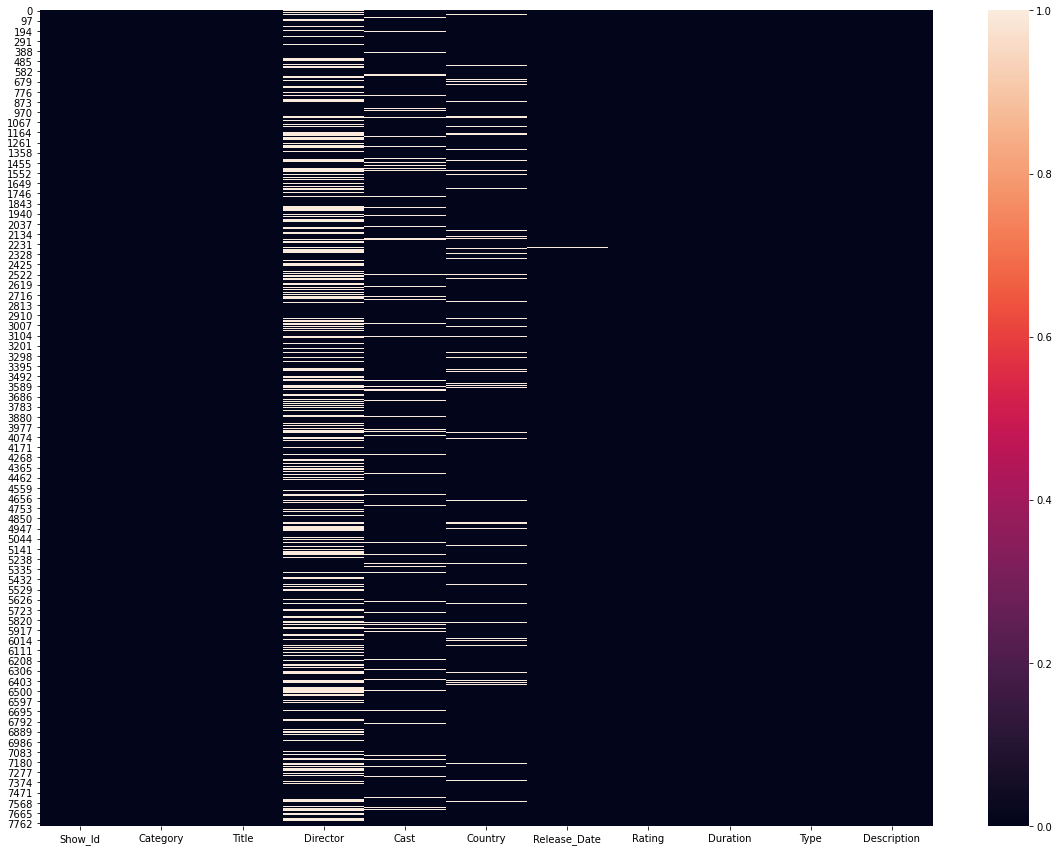

In [105]:
# Plotting a heat map of null values.
plt.figure(figsize = [20,15])
sns.heatmap(data.isnull())
plt.show()

# Question - 1 : For "House of Cards", what is the show id and who is the director of this show?

In [106]:
data.head()

Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

                                                Type  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         Description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [107]:
data[data["Title"]=="House of Cards"][["Title","Show_Id" , "Director"]]

Title Show_Id  \
2832  House of Cards   s2833   

                                               Director  
2832  Robin Wright, David Fincher, Gerald McRaney, J...

##### Answer : Show_Id - s2833 and Director - Robin Wright, David Fincher, Gerald McRaney

# Question - 2 : In which year highest number of TV Shows and movies were released ? Show with graph.

In [108]:
data.head()

Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

                                                Type  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         Description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [109]:
# Checking datatype of the column "Release_Date"
data["Release_Date"].dtype

dtype('O')

In [110]:
# Converting datatype of the column "Release_Date" to datetime format.

data["Release_Date"] = pd.to_datetime(data["Release_Date"])

In [111]:
# Checking datatype of the column "Release_Date"
data["Release_Date"].dtype

dtype('<M8[ns]')

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7787 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7787 non-null   object        
 1   Category      7787 non-null   object        
 2   Title         7787 non-null   object        
 3   Director      5399 non-null   object        
 4   Cast          7069 non-null   object        
 5   Country       7280 non-null   object        
 6   Release_Date  7777 non-null   datetime64[ns]
 7   Rating        7780 non-null   object        
 8   Duration      7787 non-null   object        
 9   Type          7787 non-null   object        
 10  Description   7787 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 730.0+ KB


In [113]:
# Creating a new column "Year"

data["Year"] = data["Release_Date"].dt.year

In [114]:
data.head()

Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  Release_Date Rating   Duration  \
0   2020-08-14  TV-MA  4 Seasons   
1   2016-12-23  TV-MA     93 min   
2   2018-12-20      R     78 min   
3   2017-11-16  PG-13     80 min   
4   2020-01-01  PG-13    123 min   

                                                Type  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         Description    Year  
0  In a future where the elite inhabit an island ...  2020.0  
1  After a devastating earthquake hits Mexico Cit...  2016.0  
2  When an army recruit is found dead, his fellow...  2018.0  
3  In a postapocalyptic world, rag-doll robots hi...  2017.0  
4  A brilliant group of students become card-coun...  2020.0

In [115]:
d = data.groupby(by = "Year").count()["Show_Id"].sort_values(ascending = False)

In [116]:
d

Year
2019.0    2153
2020.0    2009
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: Show_Id, dtype: int64

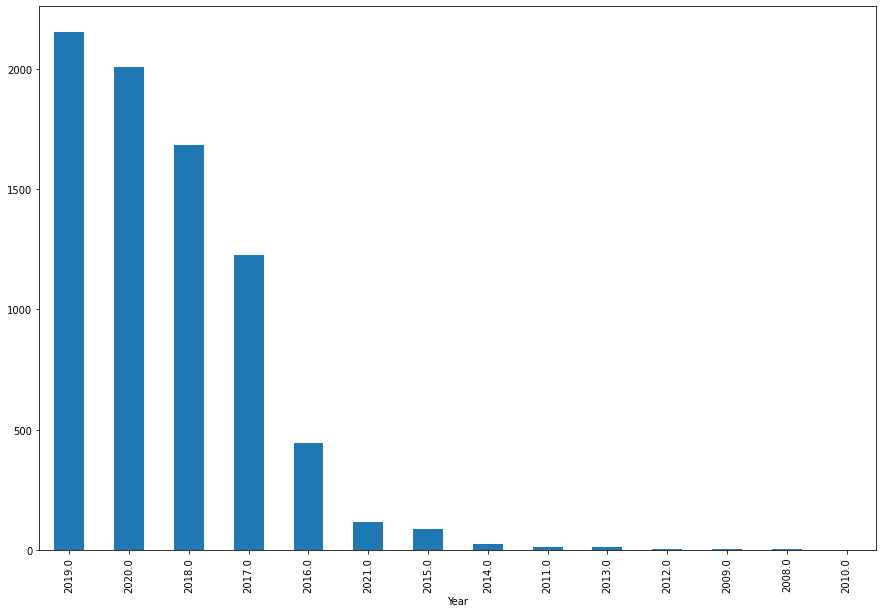

In [117]:
plt.figure(figsize = [15,10])
d.plot.bar()
plt.show()

##### Answer : In the year 2019 highest number of movies and tv shows were released.

# Question - 3 : How many movies and tv shows are in the data set ? Show with graph.

In [118]:
data.head()

Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  Release_Date Rating   Duration  \
0   2020-08-14  TV-MA  4 Seasons   
1   2016-12-23  TV-MA     93 min   
2   2018-12-20      R     78 min   
3   2017-11-16  PG-13     80 min   
4   2020-01-01  PG-13    123 min   

                                                Type  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         Description    Year  
0  In a future where the elite inhabit an island ...  2020.0  
1  After a devastating earthquake hits Mexico Cit...  2016.0  
2  When an army recruit is found dead, his fellow...  2018.0  
3  In a postapocalyptic world, rag-doll robots hi...  2017.0  
4  A brilliant group of students become card-coun...  2020.0

In [119]:
data["Category"].value_counts()

Movie      5377
TV Show    2410
Name: Category, dtype: int64

In [120]:
d = data.groupby(by = "Category").count()["Show_Id"]
d

Category
Movie      5377
TV Show    2410
Name: Show_Id, dtype: int64

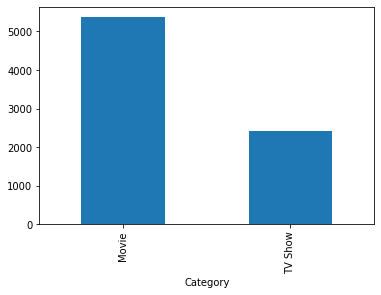

In [121]:
d.plot.bar()
plt.show()

##### Answer : Category Movie      5377 and TV Show    2410

# Question - 4 : Show all the movies that were released in year 2020.

In [122]:
data.head()

Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  Release_Date Rating   Duration  \
0   2020-08-14  TV-MA  4 Seasons   
1   2016-12-23  TV-MA     93 min   
2   2018-12-20      R     78 min   
3   2017-11-16  PG-13     80 min   
4   2020-01-01  PG-13    123 min   

                                                Type  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         Description    Year  
0  In a future where the elite inhabit an island ...  2020.0  
1  After a devastating earthquake hits Mexico Cit...  2016.0  
2  When an army recruit is found dead, his fellow...  2018.0  
3  In a postapocalyptic world, rag-doll robots hi...  2017.0  
4  A brilliant group of students become card-coun...  2020.0

In [123]:
data[(data["Category"]=="Movie") & (data["Year"] == 2020)]

Show_Id Category                                              Title  \
4         s5    Movie                                                 21   
6         s7    Movie                                                122   
14       s15    Movie                                               3022   
27       s28    Movie                                             #Alive   
28       s29    Movie                      #AnneFrank - Parallel Stories   
30       s31    Movie                                   #cats_the_mewvie   
31       s32    Movie                                  #FriendButMarried   
32       s33    Movie                                #FriendButMarried 2   
43       s44    Movie                                            Òlòtūré   
73       s74    Movie                                        18 Presents   
75       s76    Movie                                                1BR   
77       s78    Movie                                   2 Alone in Paris   
94       s95    Movie                                            28 Days   
96       s97    Movie                                     3 Days to Kill   
106     s107    Movie                                           365 Days   
107     s108    Movie                                         37 Seconds   
109     s110    Movie                                          40 Sticks   
116     s117    Movie                                       4th Republic   
121     s122    Movie                                     50 First Dates   
124     s125    Movie                                              5Gang   
144     s145    Movie                                            93 Days   
147     s148    Movie            A Babysitter's Guide to Monster Hunting   
148     s149    Movie                               A Bad Moms Christmas   
153     s154    Movie                                   A Bridge Too Far   
154     s155    Movie                             A California Christmas   
155     s156    Movie                                   A Champion Heart   
156     s157    Movie                                 A Chaster Marriage   
157     s158    Movie                                             A Choo   
158     s159    Movie                                  A Christmas Catch   
163     s164    Movie                                 A Cinderella Story   
165     s166    Movie                                 A Clockwork Orange   
168     s169    Movie                                  A Fall from Grace   
175     s176    Movie                                      A Ghost Story   
177     s178    Movie                    A Go! Go! Cory Carson Christmas   
178     s179    Movie                    A Go! Go! Cory Carson Halloween   
179     s180    Movie                  A Go! Go! Cory Carson Summer Camp   
183     s184    Movie                                    A Haunted House   
189     s190    Movie                            A Kid from Coney Island   
194     s195    Movie      A Life of Speed: The Juan Manuel Fangio Story   
200     s201    Movie                            A Love Song for Latasha   
209     s210    Movie                       A New York Christmas Wedding   
217     s218    Movie                           A Princess for Christmas   
223     s224    Movie                                      A Secret Love   
227     s228    Movie               A Shaun the Sheep Movie: Farmageddon   
234     s235    Movie                                              A Sun   
238     s239    Movie                    A Thin Line Between Love & Hate   
240     s241    Movie                                   A Thousand Words   
242     s243    Movie                            A Trash Truck Christmas   
244     s245    Movie                                  A truthful Mother   
246     s247    Movie                           A Very Country Christmas   
249     s250    Movie                                A Very Special Love   
250     s251    Movie                                

# Question - 5 : Show only the titles of all tv shows that were released in India only.

In [124]:
data.head()

Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  Release_Date Rating   Duration  \
0   2020-08-14  TV-MA  4 Seasons   
1   2016-12-23  TV-MA     93 min   
2   2018-12-20      R     78 min   
3   2017-11-16  PG-13     80 min   
4   2020-01-01  PG-13    123 min   

                                                Type  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         Description    Year  
0  In a future where the elite inhabit an island ...  2020.0  
1  After a devastating earthquake hits Mexico Cit...  2016.0  
2  When an army recruit is found dead, his fellow...  2018.0  
3  In a postapocalyptic world, rag-doll robots hi...  2017.0  
4  A brilliant group of students become card-coun...  2020.0

In [125]:
pd.set_option("display.max_row" , None)

In [126]:
data[(data["Country"]=="India") & (data["Category"]=="TV Show")]["Title"]

86                       21 Sarfarosh: Saragarhi 1897
132                                         7 (Seven)
340                                      Agent Raghav
364                                      Akbar Birbal
533                               Anjaan: Rural Myths
534                       Anjaan: Special Crimes Unit
686                       Bad Boy Billionaires: India
698                        Badalte Rishton Ki Dastaan
750                                     Bard of Blood
856                                            Betaal
879                                       Bh Se Bhade
880                                Bhaag Beanie Bhaag
881                                    Bhaage Re Mann
1316                                     Chhota Bheem
1377    ChuChu TV Nursery Rhymes & Kids Songs (Hindi)
1412                                  Classic Legends
1463                                  College Romance
1533                    Cricket Fever: Mumbai Indians
1622                        

# Question - 6 : Show top 10 directors , who gave the highest number of tv shows and movies to Netflix.

In [127]:
data.head()

Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  Release_Date Rating   Duration  \
0   2020-08-14  TV-MA  4 Seasons   
1   2016-12-23  TV-MA     93 min   
2   2018-12-20      R     78 min   
3   2017-11-16  PG-13     80 min   
4   2020-01-01  PG-13    123 min   

                                                Type  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         Description    Year  
0  In a future where the elite inhabit an island ...  2020.0  
1  After a devastating earthquake hits Mexico Cit...  2016.0  
2  When an army recruit is found dead, his fellow...  2018.0  
3  In a postapocalyptic world, rag-doll robots hi...  2017.0  
4  A brilliant group of students become card-coun...  2020.0

In [128]:
data["Director"].value_counts().sort_values(ascending = False).head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          10
David Dhawan               9
Quentin Tarantino          8
Name: Director, dtype: int64

# Question - 7 : Show all the records where category is movie and type is comedies or country is United Kingdom.

In [129]:
data.head()

Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  Release_Date Rating   Duration  \
0   2020-08-14  TV-MA  4 Seasons   
1   2016-12-23  TV-MA     93 min   
2   2018-12-20      R     78 min   
3   2017-11-16  PG-13     80 min   
4   2020-01-01  PG-13    123 min   

                                                Type  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         Description    Year  
0  In a future where the elite inhabit an island ...  2020.0  
1  After a devastating earthquake hits Mexico Cit...  2016.0  
2  When an army recruit is found dead, his fellow...  2018.0  
3  In a postapocalyptic world, rag-doll robots hi...  2017.0  
4  A brilliant group of students become card-coun...  2020.0

In [130]:
data[(data["Category"]=="Movie") & (data["Type"].str.contains("Comedies")) | (data["Country"].str.contains("United Kingdom"))]

Show_Id Category                                              Title  \
18       s19    Movie                                             15-Aug   
19       s20    Movie                                                '89   
33       s34    Movie                                       #realityhigh   
34       s35    Movie                                              #Roxy   
36       s37    Movie                                            #Selfie   
37       s38    Movie                                         #Selfie 69   
39       s40    Movie                                     ¡Ay, mi madre!   
40       s41    Movie                                        Çarsi Pazar   
42       s43    Movie                        Çok Filim Hareketler Bunlar   
48       s49    Movie                                10 Days in Sun City   
49       s50    Movie                                     10 jours en or   
58       s59  TV Show                                        100% Hotter   
72       s73    Movie                                           17 Again   
77       s78    Movie                                   2 Alone in Paris   
78       s79    Movie                                           2 States   
82       s83    Movie                                2036 Origin Unknown   
84       s85    Movie                                          21 & Over   
85       s86  TV Show                                           21 Again   
92       s93    Movie                        27, el club de los malditos   
93       s94    Movie                                  27: Gone Too Soon   
94       s95    Movie                                            28 Days   
100     s101    Movie                                           3 Idiots   
102     s103    Movie                                3 Türken & ein Baby   
103     s104    Movie                                  30 Days of Luxury   
104     s105    Movie                                 30 Minutes or Less   
113     s114    Movie                                48 Christmas Wishes   
114     s115    Movie                                                 4L   
115     s116    Movie                                        4th Man Out   
117     s118    Movie                                     5 Cowok Jagoan   
118     s119    Movie                                       5 Flights Up   
119     s120    Movie                                   5 Star Christmas   
120     s121    Movie                                             5 to 7   
121     s122    Movie                                     50 First Dates   
122     s123    Movie                                              50/50   
124     s125    Movie                                              5Gang   
126     s127    Movie                                             6 Days   
131     s132    Movie                                            68 Kill   
135     s136    Movie                                  7 Din Mohabbat In   
143     s144    Movie                                              90 ML   
148     s149    Movie                               A Bad Moms Christmas   
153     s154    Movie                                   A Bridge Too Far   
154     s155    Movie                             A California Christmas   
156     s157    Movie                                 A Chaster Marriage   
163     s164    Movie                                 A Cinderella Story   
164     s165    Movie                 A Cinderella Story: Christmas Wish   
165     s166    Movie                                 A Clockwork Orange   
167     s168    Movie                                A Fairly Odd Summer   
174     s175    Movie                        A Futile and Stupid Gesture   
176     s177    Movie      A Glimpse Inside the Mind of Charles Swan III   
181     s182    Movie             A Grand Night In: The Story of Aardman   
183     s184    Movie                                    A Haunted House   
186     s187    Movie                               A

# Question - 8 : In how many movies/shows Tom Cruise was cast ?

In [131]:
data.head()

Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  Release_Date Rating   Duration  \
0   2020-08-14  TV-MA  4 Seasons   
1   2016-12-23  TV-MA     93 min   
2   2018-12-20      R     78 min   
3   2017-11-16  PG-13     80 min   
4   2020-01-01  PG-13    123 min   

                                                Type  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         Description    Year  
0  In a future where the elite inhabit an island ...  2020.0  
1  After a devastating earthquake hits Mexico Cit...  2016.0  
2  When an army recruit is found dead, his fellow...  2018.0  
3  In a postapocalyptic world, rag-doll robots hi...  2017.0  
4  A brilliant group of students become card-coun...  2020.0

In [132]:
d = data[~(data["Cast"].isnull())]


In [133]:
d[d["Cast"].str.contains("Tom Cruise")]

Show_Id Category     Title              Director  \
3860   s3861    Movie  Magnolia  Paul Thomas Anderson   
5071   s5071    Movie  Rain Man        Barry Levinson   

                                                   Cast        Country  \
3860  Jeremy Blackman, Tom Cruise, Melinda Dillon, A...  United States   
5071  Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...  United States   

     Release_Date Rating Duration                        Type  \
3860   2020-01-01      R  189 min  Dramas, Independent Movies   
5071   2019-07-01      R  134 min      Classic Movies, Dramas   

                                            Description    Year  
3860  Through chance, human action, past history and...  2020.0  
5071  A fast-talking yuppie is forced to slow down w...  2019.0

##### Answer : There are 2 movies in which Tom Cruise was cast.

# Question - 9 : What are the different ratings defined by Netflix?

In [134]:
data.head()

Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  Release_Date Rating   Duration  \
0   2020-08-14  TV-MA  4 Seasons   
1   2016-12-23  TV-MA     93 min   
2   2018-12-20      R     78 min   
3   2017-11-16  PG-13     80 min   
4   2020-01-01  PG-13    123 min   

                                                Type  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         Description    Year  
0  In a future where the elite inhabit an island ...  2020.0  
1  After a devastating earthquake hits Mexico Cit...  2016.0  
2  When an army recruit is found dead, his fellow...  2018.0  
3  In a postapocalyptic world, rag-doll robots hi...  2017.0  
4  A brilliant group of students become card-coun...  2020.0

In [135]:
data["Rating"].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [136]:
data["Rating"].nunique()

14

# Question 9.1 : How many movies got the "TV-14" rating in Canada?

In [137]:
data[(data["Category"]=="Movie") & (data["Rating"]=="TV-14") & (data["Country"]=="Canada")].shape

(11, 12)

##### Answer : 11

# Question 9.2 : How many TV shows got "R" rating after year 2018?

In [138]:
data.head()

Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  Release_Date Rating   Duration  \
0   2020-08-14  TV-MA  4 Seasons   
1   2016-12-23  TV-MA     93 min   
2   2018-12-20      R     78 min   
3   2017-11-16  PG-13     80 min   
4   2020-01-01  PG-13    123 min   

                                                Type  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         Description    Year  
0  In a future where the elite inhabit an island ...  2020.0  
1  After a devastating earthquake hits Mexico Cit...  2016.0  
2  When an army recruit is found dead, his fellow...  2018.0  
3  In a postapocalyptic world, rag-doll robots hi...  2017.0  
4  A brilliant group of students become card-coun...  2020.0

In [139]:
data[(data["Category"]=="TV Show") & (data["Rating"]=="R") & (data["Year"]>2018)]

Show_Id Category                                Title           Director  \
6437   s6436  TV Show  The Hateful Eight: Extended Version  Quentin Tarantino   

                                                   Cast Country Release_Date  \
6437  Samuel L. Jackson, Kurt Russell, Jennifer Jaso...     NaN   2019-04-25   

     Rating  Duration      Type  \
6437      R  1 Season  TV Shows   

                                            Description    Year  
6437  Trapped at a stagecoach stop as a storm rages ...  2019.0

##### Answer : 1

# Question 10 : What is the maximum duration of a movie/show on Netflix ?

In [140]:
data["Duration"].value_counts()

1 Season      1608
2 Seasons      382
3 Seasons      184
90 min         136
93 min         131
94 min         125
91 min         125
95 min         119
92 min         118
97 min         117
96 min         115
98 min         106
103 min        101
99 min         101
88 min         101
102 min         98
106 min         97
100 min         97
101 min         96
86 min          93
105 min         91
104 min         89
89 min          88
4 Seasons       87
87 min          87
110 min         86
107 min         85
108 min         74
112 min         65
116 min         65
85 min          63
83 min          61
109 min         61
111 min         61
84 min          60
81 min          58
5 Seasons       58
117 min         56
113 min         54
119 min         54
118 min         51
82 min          48
120 min         47
115 min         47
124 min         46
114 min         45
121 min         44
126 min         40
127 min         40
78 min          40
80 min          39
122 min         38
130 min     

In [141]:
data["Duration"].dtypes

dtype('O')

In [142]:
data.head()

Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  Release_Date Rating   Duration  \
0   2020-08-14  TV-MA  4 Seasons   
1   2016-12-23  TV-MA     93 min   
2   2018-12-20      R     78 min   
3   2017-11-16  PG-13     80 min   
4   2020-01-01  PG-13    123 min   

                                                Type  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         Description    Year  
0  In a future where the elite inhabit an island ...  2020.0  
1  After a devastating earthquake hits Mexico Cit...  2016.0  
2  When an army recruit is found dead, his fellow...  2018.0  
3  In a postapocalyptic world, rag-doll robots hi...  2017.0  
4  A brilliant group of students become card-coun...  2020.0

In [143]:
data[["duration" , "unit"]] = data["Duration"].str.split(" " , expand = True)

In [144]:
data.head()

Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  Release_Date Rating   Duration  \
0   2020-08-14  TV-MA  4 Seasons   
1   2016-12-23  TV-MA     93 min   
2   2018-12-20      R     78 min   
3   2017-11-16  PG-13     80 min   
4   2020-01-01  PG-13    123 min   

                                                Type  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         Description    Year duration     unit  
0  In a future where the elite inhabit an island ...  2020.0        4  Seasons  
1  After a devastating earthquake hits Mexico Cit...  2016.0       93      min  
2  When an army recruit is found dead, his fellow...  2018.0       78      min  
3  In a postapocalyptic world, rag-doll robots hi...  2017.0       80      min  
4  A brilliant group of students become card-coun...  2020.0      123      min

In [145]:
# Maximum duration for tv show and movie.
data["duration"] = data["duration"].astype(int)

In [146]:
# Maximum duration for tv show.
data[data["Category"]=="TV Show"]["duration"].max()

16

##### Answer : Maximum duration for tv shows is 16 seasons.

In [147]:
# Maximum duration for tv show.
data[data["Category"]=="Movie"]["duration"].max()

312

##### Maximum duration for movies is 312 minutes.

# Question 11 : Which individual country has the highest number of TV shows?

In [148]:
data.head()

Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  Release_Date Rating   Duration  \
0   2020-08-14  TV-MA  4 Seasons   
1   2016-12-23  TV-MA     93 min   
2   2018-12-20      R     78 min   
3   2017-11-16  PG-13     80 min   
4   2020-01-01  PG-13    123 min   

                                                Type  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         Description    Year  duration  \
0  In a future where the elite inhabit an island ...  2020.0         4   
1  After a devastating earthquake hits Mexico Cit...  2016.0        93   
2  When an army recruit is found dead, his fellow...  2018.0        78   
3  In a postapocalyptic world, rag-doll robots hi...  2017.0        80   
4  A brilliant group of students become card-coun...  2020.0       123   

      unit  
0  Seasons  
1      min  
2      min  
3      min  
4      min

In [149]:
d = data[data["Category"]=="TV Show"]

In [150]:
d["Country"].value_counts().sort_values(ascending = False).head(5)

United States     705
United Kingdom    204
Japan             157
South Korea       147
India              71
Name: Country, dtype: int64

##### Answer : United States

# Question 12 : How can we sort the data set by year ?

In [151]:
data.sort_values(by = "Year").head(50)

Show_Id Category                                              Title  \
7115   s7114    Movie                               To and From New York   
1765   s1766  TV Show                                    Dinner for Five   
3248   s3249    Movie                            Just Another Love Story   
5766   s5766    Movie                                           Splatter   
3840   s3841    Movie                        Mad Ron's Prevues from Hell   
6847   s6846    Movie                               The Ryan White Story   
308     s309    Movie                           Adam: His Song Continues   
7416   s7415    Movie                                   Victim of Beauty   
7232   s7231    Movie                               Triumph of the Heart   
7364   s7363    Movie                                   Unspeakable Acts   
232     s233    Movie                         A Stoning in Fulham County   
2962   s2963    Movie                        In Defense of a Married Man   
2622   s2623    Movie                                       Hard Lessons   
5833   s5833    Movie                                     Strange Voices   
2041   s2042    Movie                                      Even the Rain   
3221   s3222    Movie                             Joseph: King of Dreams   
7151   s7150    Movie                                 Too Young the Hero   
5042   s5042    Movie         Quiet Victory: The Charlie Wedemeyer Story   
1229   s1230    Movie                                   Casa de mi Padre   
3466   s3467    Movie                             Kung Fu Panda: Holiday   
818     s819    Movie                  Being Elmo: A Puppeteer's Journey   
5588   s5588    Movie                                  Shrek the Musical   
3098   s3099  TV Show                                        Jack Taylor   
6057   s6057  TV Show                                           The 4400   
2948   s2949    Movie                        Iliza Shlesinger: War Paint   
1089   s1090  TV Show                                       Breaking Bad   
2503   s2504  TV Show                                        Gossip Girl   
220     s221    Movie                         A Russell Peters Christmas   
6866   s6865    Movie                                     The Short Game   
649     s650    Movie                          Aziz Ansari: Buried Alive   
5315   s5315    Movie                          Russell Peters: Notorious   
5313   s5313  TV Show                       Russell Peters vs. the World   
4147   s4148    Movie                                       Mission Blue   
1310   s1311    Movie                 Chelsea Peretti: One of the Greats   
4153   s4154    Movie                                               Mitt   
6117   s6117    Movie                  The Battered Bastards of Baseball   
3966   s3967    Movie            Marvel's Iron Man & Hulk: Heroes United   
1026   s1027    Movie  BoJack Horseman Christmas Special: Sabrina's C...   
6900   s6899    Movie                                         The Square   
7522   s7521  TV Show                                              Weeds   
1309   s1310    Movie         Chelsea Handler: Uganda Be Kidding Me Live   
2498   s2499  TV Show                                         Goosebumps   
6158   s6158  TV Show                                        The Borgias   
914     s915    Movie             Bill Burr: I'm Sorry You Feel That Way   
6631   s6630  TV Show                               The Magic School Bus   
4333   s4334    Movie      My Little Pony Equestria Girls: Rainbow Rocks   
3643   s3644  TV Show                                         Lilyhammer   
4812   s4813    Movie             Pee-wee's Playhouse: Christmas Special   
2386   s2387    Movie                                          Get Santa   
1902   s1903    Movie                                             E-Team   

                           Director  \
7115           Sorin Dan Mihalcescu   
1765                            NaN   
3248       

# Question 13 :  Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'.

In [152]:
data[(data["Category"]=="Movie") & (data["Type"]=="Dramas") | (data["Category"]=="TV Show") & (data["Type"]=="Kids' TV")]

Show_Id Category                                              Title  \
4         s5    Movie                                                 21   
7         s8    Movie                                                187   
111     s112  TV Show                                            44 Cats   
170     s171    Movie                                       A Family Man   
232     s233    Movie                         A Stoning in Fulham County   
276     s277  TV Show                                       Abby Hatcher   
295     s296    Movie                                 Across Grace Alley   
308     s309    Movie                           Adam: His Song Continues   
330     s331    Movie                                          Aftermath   
334     s335    Movie                     Agatha and the Truth of Murder   
422     s423    Movie                                   All Together Now   
429     s430    Movie                                    Alone in Berlin   
434     s435  TV Show                                        Alphablocks   
455     s456    Movie                                    American Beauty   
466     s467    Movie                                 American History X   
474     s475    Movie                                       American Son   
476     s477    Movie                                American Warfighter   
598     s599  TV Show                                  Ask the StoryBots   
613     s614    Movie                            Atlas Shrugged: Part II   
701     s702    Movie                                            Badland   
706     s707  TV Show                                         Bal Ganesh   
735     s736  TV Show                       Barbie Dreamhouse Adventures   
736     s737  TV Show      Barbie Dreamhouse Adventures: Go Team Roberts   
755     s756    Movie                                              Barry   
760     s761  TV Show                                            Bat Pat   
779     s780  TV Show                                        Be-Be-Bears   
786     s787  TV Show                                          Beat Bugs   
828     s829  TV Show                       Ben & Holly's Little Kingdom   
829     s830  TV Show                                             Ben 10   
946     s947    Movie                       Black & Privileged: Volume 1   
993     s994    Movie                                               Blow   
1010   s1011  TV Show                                      Bo on the Go!   
1034   s1035    Movie                                          Bombshell   
1044   s1045  TV Show                                          Bookmarks   
1075   s1076  TV Show                                         Brainchild   
1140   s1141  TV Show  Bure Kaam Bura Natija, Kyun Bhai Chacha Haan B...   
1146   s1147    Movie                                       Burning Cane   
1173   s1174  TV Show                                    Calico Critters   
1174   s1175  TV Show               Calico Critters Mini Episodes Clover   
1213   s1214  TV Show                               Care Bears & Cousins   
1214   s1215  TV Show                  Care Bears: Welcome to Care-a-Lot   
1242   s1243    Movie                                Catch Me If You Can   
1256   s1257    Movie                                       Center Stage   
1273   s1274    Movie                                  Change in the Air   
1275   s1276    Movie                                     Chappaquiddick   
1282   s1283  TV Show                          Charlie's Colorforms City   
1316   s1317  TV Show                                       Chhota Bheem   
1321   s1322  TV Show                Chhota Bheem Kung Fu Dhamaka Series   
1328   s1329  TV Show             Chico Bon Bon: Monkey with a Tool Belt   
1341   s1342  TV Show                                    Chip and Potato   
1347   s1348    Movie                        Chocolate City: Vegas Strip   
1365   s1366    Movie                         Christm

### Thank You
## Sumit Bhatia